# 时间序列
* 利用Python进行数据分析 第十章

In [1]:
from datetime import datetime
from datetime import timedelta

from dateutil.parser import parse
from IPython.display import Image

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 一、日期和时间数据类型及工具

In [6]:
now = datetime.now() # 以毫秒形式存储日期和时间

print(now)
now.year,now.month,now.day

2016-12-09 16:36:59.664719


(2016, 12, 9)

In [10]:
delta = datetime(2011,1,7) - datetime(2008,6,24,8,15)
print(delta)

print(delta.days)
delta.seconds

926 days, 15:45:00
926


56700

In [16]:
start = datetime(2011,1,7)
print(start)

print(start + timedelta(12))
start - 2 * timedelta(12)

2011-01-07 00:00:00
2011-01-19 00:00:00


datetime.datetime(2010, 12, 14, 0, 0)

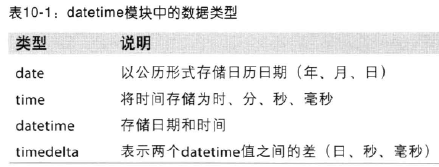

In [17]:
Image(filename="py35_picture\Datetime.png")

### 1 字符串和datetime的相互转换
* 利用str或strftime方法（传入一个格式化字符串），datetime对象和pandas的Timestamp对象可以被格式化为字符串

In [22]:
stamp = datetime(2011,1,3)

print(str(stamp))
stamp.strftime('%Y-%m-%d')

2011-01-03 00:00:00


'2011-01-03'

In [25]:
value = '2011-01-03'
print(datetime.strptime(value,'%Y-%m-%d')) # 通过已知格式进行日期解析的最佳方式

datestrs = ['7/6/2011','8/6/2011']
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]

2011-01-03 00:00:00


[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [32]:
# 每次编写格式定义是很麻烦的事情，尤其是一些常见格式。可用dateutil中的parser.parse方法：
print(parse('2001-01-03')) # 可解析几乎所有的日期表示形式（中文除外）
print(parse('Jan 31, 1997 10:45 PM'))

parse('6/12/2011', dayfirst = True) # 日出现在月前面时

2001-01-03 00:00:00
1997-01-31 22:45:00


datetime.datetime(2011, 12, 6, 0, 0)

In [38]:
datestrs = ['7/6/2011','8/6/2011']
print(pd.to_datetime(datestrs)) # 可以解析多种不同的日期表示形式

idx = pd.to_datetime(datestrs + [None])
print(idx)
print(idx[2])
pd.isnull(idx)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)
NaT


array([False, False,  True], dtype=bool)

In [40]:
a = {'Year':np.arange(2010,2015),'Mon':np.arange(1,6),'Day':np.arange(10,15)}
data = pd.DataFrame(a)
data[['Year','Mon','Day']]

,Year,Mon,Day
0,2010,1,10
1,2011,2,11
2,2012,3,12
3,2013,4,13
4,2014,5,14


In [46]:
ymds = []
for i in range(len(data)):
    ymd = str(data['Year'][i]) + '/' + str(data['Mon'][i]) + '/' + str(data['Day'][i])
    ymds.append(ymd)
    print(ymd)
ymds

2010/1/10
2011/2/11
2012/3/12
2013/4/13
2014/5/14


['2010/1/10', '2011/2/11', '2012/3/12', '2013/4/13', '2014/5/14']

In [47]:
pd.to_datetime(ymds)

DatetimeIndex(['2010-01-10', '2011-02-11', '2012-03-12', '2013-04-13',
               '2014-05-14'],
              dtype='datetime64[ns]', freq=None)

In [56]:
data.columns = ['day','mon','year']
print(data)
data[['year','mon','day']]

   day  mon  year
0   10    1  2010
1   11    2  2011
2   12    3  2012
3   13    4  2013
4   14    5  2014


['year', 'mon', 'day']

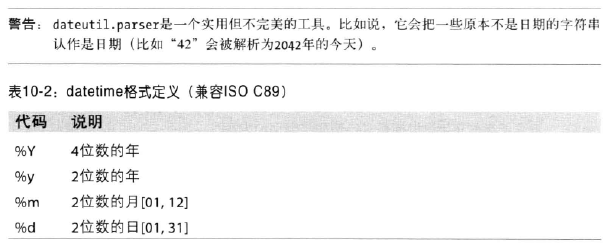

In [41]:
Image(filename="py35_picture\Datetime 1.png")

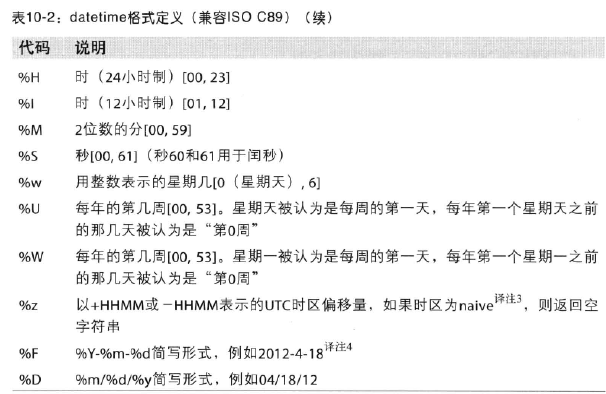

In [40]:
Image(filename="py35_picture\Datetime 2.png")

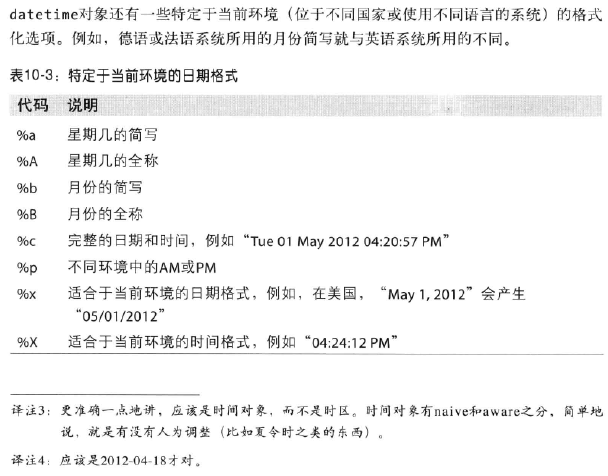

In [39]:
Image(filename="py35_picture\Datetime 3.png")

## 二、时间序列基础

In [2]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
 datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(np.random.randn(6), index = dates)
print(ts)
print()
print(type(ts))
print()
print(ts.index)

ts + ts[::2] # 不同索引的时间序列之间的算术运算会自动按日期对齐

2011-01-02   -0.916669
2011-01-05   -0.296275
2011-01-07   -0.052871
2011-01-08   -1.125371
2011-01-10    0.510460
2011-01-12    0.473304
dtype: float64

<class 'pandas.core.series.Series'>

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)


2011-01-02   -1.833338
2011-01-05         NaN
2011-01-07   -0.105741
2011-01-08         NaN
2011-01-10    1.020920
2011-01-12         NaN
dtype: float64

In [3]:
print(ts.index.dtype) # pandas 用Numpy的datetime数据类型以纳秒形式存储时间戳
print()

stamp = ts.index[0]
stamp

datetime64[ns]



Timestamp('2011-01-02 00:00:00')

### 1 索引、选取、子集构造

In [8]:
stamp = ts.index[2]
print(ts[stamp])
print()
print(ts['1/10/2011']) # 传入一个可以被解释为日期的字符串
print()
print(ts['20110110'])

-0.0528706465307

0.510460084351

0.510460084351


In [31]:
longer_ts = pd.Series(np.random.randn(1000),
                  index = pd.date_range('1/1/2000',periods=1000))

### 2 带有重复索引的时间序列
* 多个观测数据落在同一个时间点上

In [15]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000',
     '1/3/2000'])
print(dates)
print()
dup_ts = pd.Series(np.arange(5),index = dates)
print(dup_ts)
print()
print(dup_ts.index.is_unique) # 是否唯一

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-02', '2000-01-02',
               '2000-01-03'],
              dtype='datetime64[ns]', freq=None)

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

False


In [17]:
print(dup_ts['1/3/2000']) # 不重复
print()
print(dup_ts['1/2/2000']) #重复

4

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32


In [18]:
# 对具有非唯一时间戳的数据进行聚合：groupby（level= 0,索引的唯一一层）
grouped = dup_ts.groupby(level = 0)
print(grouped.mean())
print()
print(grouped.count())

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64


## 三、日期的范围、频率以及移动

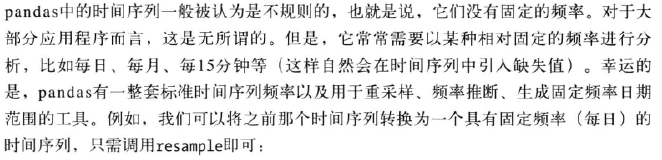

In [20]:
Image(filename="py35_picture\Date_Range.png")

In [25]:
print(ts)
print()
print(ts.resample('D').mean())

2011-01-02   -0.916669
2011-01-05   -0.296275
2011-01-07   -0.052871
2011-01-08   -1.125371
2011-01-10    0.510460
2011-01-12    0.473304
dtype: float64

2011-01-02   -0.916669
2011-01-03         NaN
2011-01-04         NaN
2011-01-05   -0.296275
2011-01-06         NaN
2011-01-07   -0.052871
2011-01-08   -1.125371
2011-01-09         NaN
2011-01-10    0.510460
2011-01-11         NaN
2011-01-12    0.473304
Freq: D, dtype: float64


### 1 生成日期范围

In [35]:
index = pd.date_range('4/1/2012', '6/1/2012') # 默认按天计算时间点
print(index)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [39]:
print(pd.date_range(start = '4/1/2012',periods = 20)) # 时间起始点，及一段长度
print()
print(pd.date_range(end = '6/1/2012',periods = 20))
print()
print(pd.date_range('6/1/2010','12/1/2000',freq = 'BM')) # bussiness end of month

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

DatetimeIndex([], dtype='datetime64[ns]', freq='BM')


In [42]:
print(pd.date_range('5/2/2012 12:56:31',periods = 5)) # 默认会保留起始和结束时间戳的时间信息
print()
print(pd.date_range('5/2/2012 12:56:31',periods = 5, normalize = True)) # 规范化到午夜的时间戳

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')


### 2 频率和日期偏移量

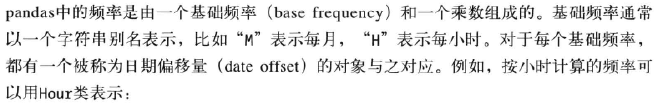

In [43]:
Image(filename="py35_picture\Freq date.png")

In [49]:
from pandas.tseries.offsets import Hour,Minute
hour = Hour()
print(hour)
print()
four_hours = Hour(4) # 传入整数即可定义偏移量的倍数
print(four_hours)

<Hour>

<4 * Hours>


In [50]:
pd.date_range('1/1/2000','1/3/2000 23:59',freq = '4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [51]:
Hour(2) + Minute(30) # 大部分偏移量对象都可以通过加法进行连接

<150 * Minutes>

In [52]:
pd.date_range('1/1/2000',periods = 10, freq = '1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

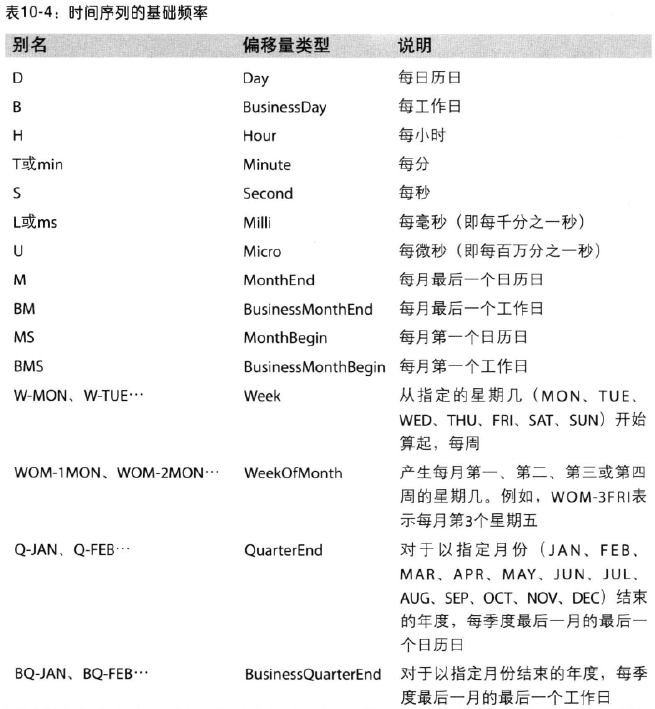

In [53]:
Image(filename="py35_picture\Base Frequency.png")

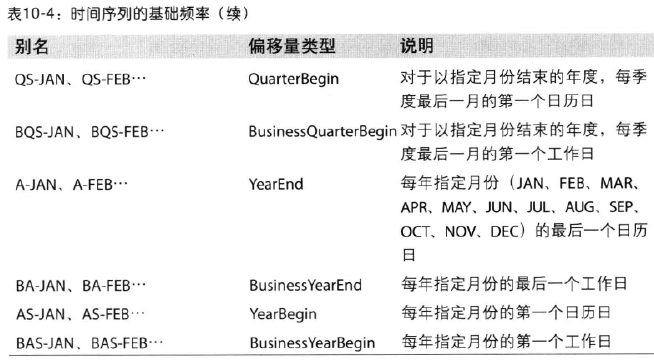

In [55]:
Image(filename="py35_picture\Base Frequency 2.png")

### 3 WOM日期
* Week of Month
* 获得诸如“每月第三个星期五”之类的日期

In [60]:
rng = pd.date_range('1/1/2012','9/1/2012',frqe = 'WOM-3FRI')
list(rng)

[Timestamp('2012-01-01 00:00:00', offset='D'),
 Timestamp('2012-01-02 00:00:00', offset='D'),
 Timestamp('2012-01-03 00:00:00', offset='D'),
 Timestamp('2012-01-04 00:00:00', offset='D'),
 Timestamp('2012-01-05 00:00:00', offset='D'),
 Timestamp('2012-01-06 00:00:00', offset='D'),
 Timestamp('2012-01-07 00:00:00', offset='D'),
 Timestamp('2012-01-08 00:00:00', offset='D'),
 Timestamp('2012-01-09 00:00:00', offset='D'),
 Timestamp('2012-01-10 00:00:00', offset='D'),
 Timestamp('2012-01-11 00:00:00', offset='D'),
 Timestamp('2012-01-12 00:00:00', offset='D'),
 Timestamp('2012-01-13 00:00:00', offset='D'),
 Timestamp('2012-01-14 00:00:00', offset='D'),
 Timestamp('2012-01-15 00:00:00', offset='D'),
 Timestamp('2012-01-16 00:00:00', offset='D'),
 Timestamp('2012-01-17 00:00:00', offset='D'),
 Timestamp('2012-01-18 00:00:00', offset='D'),
 Timestamp('2012-01-19 00:00:00', offset='D'),
 Timestamp('2012-01-20 00:00:00', offset='D'),
 Timestamp('2012-01-21 00:00:00', offset='D'),
 Timestamp('2

### 4 移动（超前和滞后）数据
* 移动（shifting）指的是沿着时间轴将数据迁移或后移

In [76]:
ts = pd.Series(np.random.randn(4),
              index = pd.date_range('1/1/2000',periods = 4,freq = 'M'))
print(ts)
print()
print(ts.shift(2))
print()
print(ts.shift(-2))

2000-01-31    0.019353
2000-02-29   -0.222133
2000-03-31   -0.052624
2000-04-30   -0.466643
Freq: M, dtype: float64

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.019353
2000-04-30   -0.222133
Freq: M, dtype: float64

2000-01-31   -0.052624
2000-02-29   -0.466643
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64


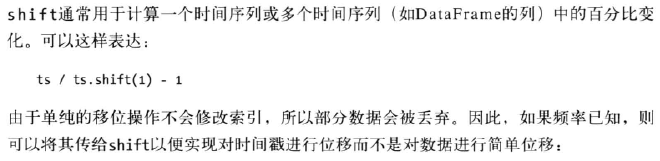

In [65]:
Image(filename="py35_picture\Shifting.png")

In [77]:
print(ts.shift(2,freq = 'M'))
print()
print(ts.shift(3,freq = 'D'))
print()
print(ts.shift(1,freq = '3D'))
ts.shift(1,freq = '90T')

2000-03-31    0.019353
2000-04-30   -0.222133
2000-05-31   -0.052624
2000-06-30   -0.466643
Freq: M, dtype: float64

2000-02-03    0.019353
2000-03-03   -0.222133
2000-04-03   -0.052624
2000-05-03   -0.466643
dtype: float64

2000-02-03    0.019353
2000-03-03   -0.222133
2000-04-03   -0.052624
2000-05-03   -0.466643
dtype: float64


2000-01-31 01:30:00    0.019353
2000-02-29 01:30:00   -0.222133
2000-03-31 01:30:00   -0.052624
2000-04-30 01:30:00   -0.466643
Freq: M, dtype: float64

* 通过偏移量对日期进行位移

In [84]:
from pandas.tseries.offsets import Day, MonthEnd

now = datetime(2011,11,17)
print(now)
print()
print(now + 3*Day())
print()
print(now + MonthEnd()) # 锚点偏移量（比如 MonthEnd），第一次增量会将原日期向前滚动到符合频率规则的下一个日期
print()
print(now + MonthEnd(2))

2011-11-17 00:00:00

2011-11-20 00:00:00

2011-11-30 00:00:00

2011-12-31 00:00:00


In [87]:
offset = MonthEnd()
print(offset.rollforward(now)) # 锚点偏移量的两种方法
print()
print(offset.rollback(now))

2011-11-30 00:00:00

2011-10-31 00:00:00


In [89]:
ts = pd.Series(np.random.randn(20),
              index = pd.date_range('1/15/2000',periods = 20, freq = '4d'))
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.007449
2000-02-29    0.460215
2000-03-31    0.185445
dtype: float64

## 四、时区处理

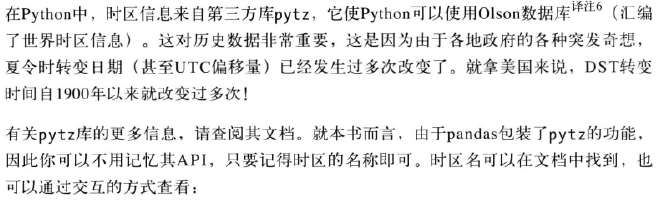

In [90]:
Image(filename="py35_picture\Time zone handling.png")

In [94]:
import pytz

print(pytz.common_timezones[-5:])
print()
tz = pytz.timezone('US/Eastern') # 从pytz中获取时区对象
tz

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']



<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

### 1 本地化和转换

In [98]:
rng = pd.date_range('3/9/2012 9:30', periods = 6, freq = 'D')
ts = pd.Series(np.random.randn(len(rng)), index = rng) # pandas的时间序列是单纯的（naive）时区
print(ts.index.tz)

None


In [102]:
print(pd.date_range('3/9/2012 9:30',periods = 10, freq = 'D', tz = 'UTC')) # 加上时区集
print()
ts_utc = ts.tz_localize('UTC') # 从naive到本地转换
print(ts_utc.index)
print()
print(ts_utc.tz_convert('US/Eastern')) # 转到本地之后，就可以将其转换到别的时区了

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

2012-03-09 04:30:00-05:00   -0.056250
2012-03-10 04:30:00-05:00   -1.765975
2012-03-11 05:30:00-04:00   -1.077503
2012-03-12 05:30:00-04:00    0.663905
2012-03-13 05:30:00-04:00   -1.354857
2012-03-14 05:30:00-04:00    0.043128
Freq: D, dtype: float64


In [105]:
ts_eastern = ts.tz_localize('US/Eastern') # 先本地化，再转换到UTC或柏林时间
print(ts_eastern.tz_convert('UTC'))
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 14:30:00+00:00   -0.056250
2012-03-10 14:30:00+00:00   -1.765975
2012-03-11 13:30:00+00:00   -1.077503
2012-03-12 13:30:00+00:00    0.663905
2012-03-13 13:30:00+00:00   -1.354857
2012-03-14 13:30:00+00:00    0.043128
Freq: D, dtype: float64


2012-03-09 15:30:00+01:00   -0.056250
2012-03-10 15:30:00+01:00   -1.765975
2012-03-11 14:30:00+01:00   -1.077503
2012-03-12 14:30:00+01:00    0.663905
2012-03-13 14:30:00+01:00   -1.354857
2012-03-14 14:30:00+01:00    0.043128
Freq: D, dtype: float64

In [106]:
ts.index.tz_localize('Asia/Shanghai') # tz_localize 和 tz_convert 也是DatetimeIndex的实例方法

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### 2 操作时区意识型Timestamp对象
* Timestamp对象也能被从naive本地化为时区意识型（time zone-aware），并从一个时区转换到另一个时区

In [109]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('US/Eastern')

Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

In [111]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz = 'Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

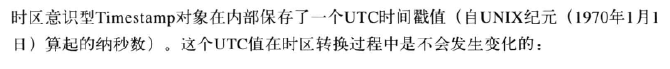

In [112]:
Image(filename="py35_picture\Time zone handling 2.png")

In [114]:
print(stamp_utc.value)
stamp_utc.tz_convert('US/Eastern').value

1299902400000000000


1299902400000000000

In [118]:
# 使用pandas的Dateoffset对象运算时，会自动关注是否存在夏令时转变期
from pandas.tseries.offsets import Hour

# 夏令时转变前30分钟
stamp = pd.Timestamp('2012-03-12 01:30', tz = 'US/Eastern')
print(stamp)
print()
print(stamp + Hour())

2012-03-12 01:30:00-04:00

2012-03-12 02:30:00-04:00


In [119]:
# 夏令时转变前90分钟
stamp = pd.Timestamp('2012-11-04 00:30', tz = 'US/Eastern')
print(stamp)
print()
print(stamp + 2 * Hour())

2012-11-04 00:30:00-04:00

2012-11-04 01:30:00-05:00


### 3 不同时区之间的运算
* 如果两个时间序列的时区不同，在将它们合并到一起时，最终结果就会使UTC。

In [126]:
rng = pd.date_range('3/7/2012 9:30', periods = 10, freq = 'B')
ts = pd.Series(np.random.randn(len(rng)), index = rng)
print(ts)
print()
ts1 = ts[:7].tz_localize('Europe/London')
print(ts1)
ts2 = ts1[2:].tz_convert('Europe/Moscow')
ts2

2012-03-07 09:30:00    1.135112
2012-03-08 09:30:00    1.669938
2012-03-09 09:30:00    0.093439
2012-03-12 09:30:00   -0.164918
2012-03-13 09:30:00   -0.930818
2012-03-14 09:30:00   -0.149066
2012-03-15 09:30:00    1.531612
2012-03-16 09:30:00   -1.826045
2012-03-19 09:30:00   -0.247548
2012-03-20 09:30:00   -0.485908
Freq: B, dtype: float64

2012-03-07 09:30:00+00:00    1.135112
2012-03-08 09:30:00+00:00    1.669938
2012-03-09 09:30:00+00:00    0.093439
2012-03-12 09:30:00+00:00   -0.164918
2012-03-13 09:30:00+00:00   -0.930818
2012-03-14 09:30:00+00:00   -0.149066
2012-03-15 09:30:00+00:00    1.531612
Freq: B, dtype: float64


2012-03-09 13:30:00+04:00    0.093439
2012-03-12 13:30:00+04:00   -0.164918
2012-03-13 13:30:00+04:00   -0.930818
2012-03-14 13:30:00+04:00   -0.149066
2012-03-15 13:30:00+04:00    1.531612
Freq: B, dtype: float64

In [128]:
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## 五、时期及其算术运算
* 时期（period）表示的是时间区间，比如数日、数月、数季等

In [136]:
p = pd.Period(2007,freq = 'A-DEC') # 2007-1-1到2007-12-31之间的整段时间
print(p)
print()
print(p + 5) # 位移
print()
print(p - 5)
pd.Period('2014', freq = 'A-DEC') - p # 如果两个Period对象拥有相同的频率，则差为它们之间的单位数量

2007

2012

2002


7

In [139]:
rng = pd.period_range('1/1/2000', '6/30/2000', freq = 'M') # 创建规则的时期范围
print(rng)
print()
print(pd.Series(np.random.randn(6), index = rng))
print()
values = ['200103','200202','200301']
index = pd.PeriodIndex(values, freq = 'Q-DEC')
print(index)

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='int64', freq='M')

2000-01    1.081385
2000-02    0.242688
2000-03    1.230622
2000-04    1.706861
2000-05    1.069073
2000-06    0.129406
Freq: M, dtype: float64

PeriodIndex(['2003Q1', '2002Q1', '2001Q1'], dtype='int64', freq='Q-DEC')


### 1 时期的频率转换

In [2]:
# 转换成别的频率：asfreq
p = pd.Period('2007', freq = 'A-DEC') # 一个年度时期
print(p.asfreq('M', how = 'start')) # 转换成当年年初的一个月度时期
print()
print(p.asfreq('M', how = 'end')) # 转换成当年年末的一个月度时期

2007-01

2007-12


In [3]:
p = pd.Period('2007', freq = 'A-JUN') # 一个年度时期
print(p.asfreq('M', how = 'start')) 
print()
print(p.asfreq('M', how = 'end')) 

2006-07

2007-06


In [4]:
p = pd.Period('2007-08','M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [6]:
rng = pd.period_range('2006','2009',freq = 'A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index = rng)
print(ts)
print()
print(ts.asfreq('M', how = 'start'))
ts.asfreq('B',how = 'end')

2006    0.231957
2007    0.888970
2008    0.980349
2009   -0.842368
Freq: A-DEC, dtype: float64

2006-01    0.231957
2007-01    0.888970
2008-01    0.980349
2009-01   -0.842368
Freq: M, dtype: float64


2006-12-29    0.231957
2007-12-31    0.888970
2008-12-31    0.980349
2009-12-31   -0.842368
Freq: B, dtype: float64

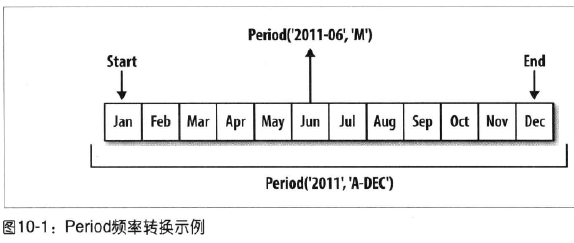

In [8]:
Image(filename="py35_picture\Period.png")

### 2 按季度计算的时期频率

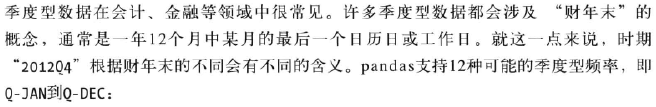

In [9]:
Image(filename="py35_picture\Quarterly Period Frequencies.png")

In [13]:
p = pd.Period('2012Q4', freq = 'Q-JAN')
print(p)
print()
print(p.asfreq('D','start'))
p.asfreq('D','end')

2012Q4

2011-11-01


Period('2012-01-31', 'D')

In [15]:
p4pm = (p.asfreq('B','e') - 1).asfreq('T','s') + 16 * 60 # 获取该季度倒数第二个工作日下午4点的时间戳
print(p4pm)
p4pm.to_timestamp()

2012-01-30 16:00


Timestamp('2012-01-30 16:00:00')

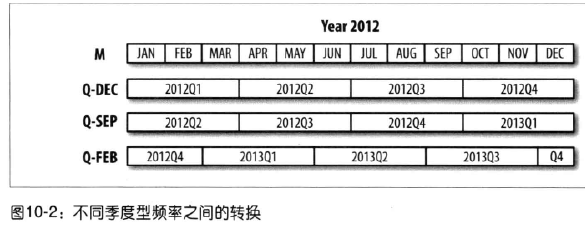

In [16]:
Image(filename="py35_picture\Different quarterly frequency conventions.png")

In [19]:
# 生成季度型范围：period_range
rng = pd.period_range('2011Q3', '2012Q4', freq = 'Q-JAN')
ts = pd.Series(np.arange(len(rng)), index = rng)
print(ts)
new_rng = (rng.asfreq('B','e') - 1).asfreq('T', 's') + 16*60
ts.index = new_rng.to_timestamp()
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32


2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### 3 将Timestamp转换为Period（及其反向过程）

In [23]:
# 将由时间戳索引的Series和DataFrame对象转换成时期索引：to_period
rng = pd.date_range('1/1/2000', periods = 3, freq = 'M')
ts = pd.Series(np.random.randn(3), index = rng)
pts = ts.to_period()
print(ts)
pts

2000-01-31   -0.013906
2000-02-29   -0.783268
2000-03-31    0.121093
Freq: M, dtype: float64


2000-01   -0.013906
2000-02   -0.783268
2000-03    0.121093
Freq: M, dtype: float64

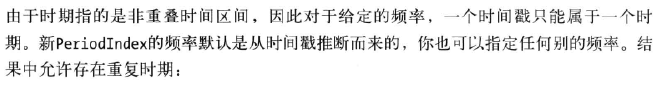

In [24]:
Image(filename="py35_picture\Converting Timestamps to Periods.png")

In [25]:
rng = pd.date_range('1/29/2000', periods = 6, freq = 'D')
ts2 = pd.Series(np.random.randn(6), index = rng)
print(ts2.to_period('M'))
print()
pts = ts.to_period()
print(pts)
pts.to_timestamp(how = 'end')

2000-01    0.025304
2000-01    0.431450
2000-01   -0.283643
2000-02    1.438120
2000-02   -0.339910
2000-02    3.687891
Freq: M, dtype: float64

2000-01   -0.013906
2000-02   -0.783268
2000-03    0.121093
Freq: M, dtype: float64


2000-01-31   -0.013906
2000-02-29   -0.783268
2000-03-31    0.121093
Freq: M, dtype: float64

### 4 通过数组创建 PeriodIndex

In [31]:
# 年度和季度分别存放在不同的列中
data = pd.read_csv('py35_data\macrodata.csv')
print(data.year)
print()
print(data.quarter)

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
6      1960.0
7      1960.0
8      1961.0
9      1961.0
10     1961.0
11     1961.0
12     1962.0
13     1962.0
14     1962.0
15     1962.0
16     1963.0
17     1963.0
18     1963.0
19     1963.0
20     1964.0
21     1964.0
22     1964.0
23     1964.0
24     1965.0
25     1965.0
26     1965.0
27     1965.0
28     1966.0
29     1966.0
        ...  
173    2002.0
174    2002.0
175    2002.0
176    2003.0
177    2003.0
178    2003.0
179    2003.0
180    2004.0
181    2004.0
182    2004.0
183    2004.0
184    2005.0
185    2005.0
186    2005.0
187    2005.0
188    2006.0
189    2006.0
190    2006.0
191    2006.0
192    2007.0
193    2007.0
194    2007.0
195    2007.0
196    2008.0
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, dtype: float64

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
6      3.0
7      4.0
8      1.0
9      2.0
10     3

In [32]:
# 将年度和季度合并成DataFrame的一个索引
index = pd.PeriodIndex(year = data.year, quarter = data.quarter, freq = 'Q-DEC')
print(index)

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='int64', length=203, freq='Q-DEC')


In [34]:
data.index = index
print(data.infl)

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
1961Q3    0.80
1961Q4    0.80
1962Q1    2.26
1962Q2    0.13
1962Q3    2.11
1962Q4    0.79
1963Q1    0.53
1963Q2    2.75
1963Q3    0.78
1963Q4    2.46
1964Q1    0.13
1964Q2    0.90
1964Q3    1.29
1964Q4    2.05
1965Q1    1.28
1965Q2    2.54
1965Q3    0.89
1965Q4    2.90
1966Q1    4.99
1966Q2    2.10
          ... 
2002Q2    1.56
2002Q3    2.66
2002Q4    3.08
2003Q1    1.31
2003Q2    1.09
2003Q3    2.60
2003Q4    3.02
2004Q1    2.35
2004Q2    3.61
2004Q3    3.58
2004Q4    2.09
2005Q1    4.15
2005Q2    1.85
2005Q3    9.14
2005Q4    0.40
2006Q1    2.60
2006Q2    3.97
2006Q3   -1.58
2006Q4    3.30
2007Q1    4.58
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, dtype: float64


## 六、重采样及频率转换

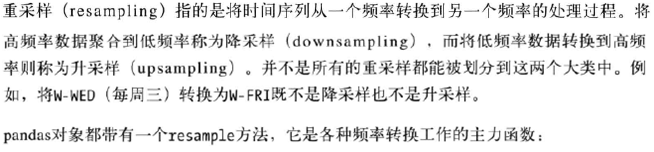

In [35]:
Image(filename="py35_picture\Resampling and Frequency conversions.png")

In [40]:
rng = pd.date_range('1/1/2000', periods = 100, freq = 'D')
ts = pd.Series(np.random.randn(len(rng)), index = rng)
print(ts.resample('M').mean())
ts.resample('M', kind = 'period').mean()

2000-01-31   -0.132660
2000-02-29   -0.084887
2000-03-31    0.002910
2000-04-30    0.577580
Freq: M, dtype: float64


2000-01   -0.132660
2000-02   -0.084887
2000-03    0.002910
2000-04    0.577580
Freq: M, dtype: float64

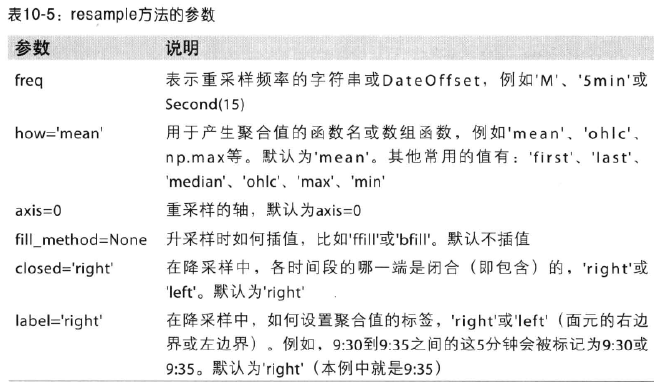

In [41]:
Image(filename="py35_picture\Resampling.png")

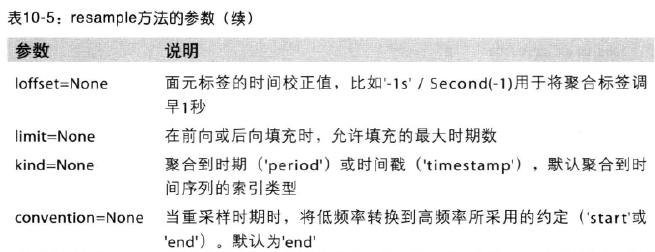

In [42]:
Image(filename="py35_picture\Resampling 2.png")

### 1 降采样

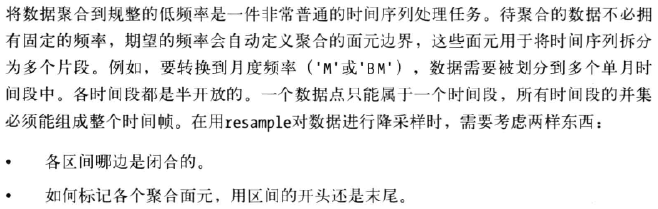

In [43]:
Image(filename="py35_picture\Downsampling.png")

In [44]:
# 一分钟数据
rng = pd.date_range('1/1/2000', periods = 12, freq = 'T')
ts = pd.Series(np.arange(12), index = rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [53]:
# 通过求和的方式将这些数据聚合到‘五分钟’的块中
print(ts.resample('5min').sum()) # 默认左边界是包含的，以左边界的时间戳进行标记
print()
print(ts.resample('5min', closed = 'right').sum()) # 右边界为包含
ts.resample('5min', closed = 'right',label = 'right').sum() # 右边界为时间戳进行标记

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32


2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

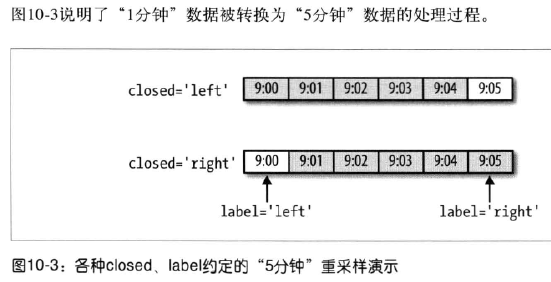

In [54]:
Image(filename="py35_picture\Time conversions.png")

In [55]:
# 位移：减去一秒
ts.resample('5min', loffset = '-1s').sum()

1999-12-31 23:59:59    10
2000-01-01 00:04:59    35
2000-01-01 00:09:59    21
Freq: 5T, dtype: int32

#### 1.1 OHLC重采样

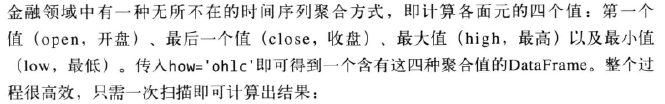

In [56]:
Image(filename="py35_picture\OHLC.png")

In [57]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


#### 1.2 通过groupby进行重采样

In [59]:
rng = pd.date_range('1/1/2000', periods = 100, freq = 'D')
ts = pd.Series(np.arange(100), index = rng)
print(ts.groupby(lambda x: x.month).mean())
print()
print(ts.groupby(lambda x: x.weekday).mean())

1    15
2    45
3    75
4    95
dtype: int32

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64


### 2 升采样和插值

In [62]:
frame = pd.DataFrame(np.random.randn(2, 4),
     index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01-05,2.069288,-0.487002,-0.989870,-1.016115
2000-01-12,1.375255,-0.996668,1.399964,0.140222


In [64]:
df_daily = frame.resample('D').mean() # 重采样到日频率，默认会引入缺失值
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,2.069288,-0.487002,-0.989870,-1.016115
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.375255,-0.996668,1.399964,0.140222


In [66]:
frame.resample('D').ffill()  # 前面的周期值填充‘非星期三’

,Colorado,Texas,New York,Ohio
2000-01-05,2.069288,-0.487002,-0.989870,-1.016115
2000-01-06,2.069288,-0.487002,-0.989870,-1.016115
2000-01-07,2.069288,-0.487002,-0.989870,-1.016115
2000-01-08,2.069288,-0.487002,-0.989870,-1.016115
2000-01-09,2.069288,-0.487002,-0.989870,-1.016115
2000-01-10,2.069288,-0.487002,-0.989870,-1.016115
2000-01-11,2.069288,-0.487002,-0.989870,-1.016115
2000-01-12,1.375255,-0.996668,1.399964,0.140222


In [69]:
frame.resample('D').ffill(limit = 2) # 只填充指定的时期数（目的是限制前面的观测值的持续使用距离）

,Colorado,Texas,New York,Ohio
2000-01-05,2.069288,-0.487002,-0.989870,-1.016115
2000-01-06,2.069288,-0.487002,-0.989870,-1.016115
2000-01-07,2.069288,-0.487002,-0.989870,-1.016115
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.375255,-0.996668,1.399964,0.140222


In [70]:
frame.resample('W-THU').ffill() # 新的日期索引完全没必要跟旧的相交

,Colorado,Texas,New York,Ohio
2000-01-06,2.069288,-0.487002,-0.989870,-1.016115
2000-01-13,1.375255,-0.996668,1.399964,0.140222


### 3 通过时期进行重采样

In [72]:
frame = pd.DataFrame(np.random.randn(24, 4),
 index=pd.period_range('1-2000', '12-2001', freq='M'),
 columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-0.083142,1.930622,1.302677,-0.760368
2000-02,0.420126,-0.616364,-2.590996,-1.039241
2000-03,0.459863,-0.210512,-0.759238,0.397434
2000-04,-0.429998,-0.776416,0.572503,0.526587
2000-05,-0.388565,0.799552,-0.400566,-0.726395


In [74]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.360226,0.105087,0.146855,-0.061421
2001,-0.565427,-0.064707,0.413199,-0.433174


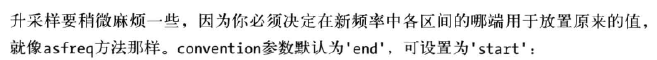

In [75]:
Image(filename="py35_picture\Resampling with Periods.png")

In [78]:
# Q-DEC: 季度型（每年以12月结束）
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.360226,0.105087,0.146855,-0.061421
2000Q2,0.360226,0.105087,0.146855,-0.061421
2000Q3,0.360226,0.105087,0.146855,-0.061421
2000Q4,0.360226,0.105087,0.146855,-0.061421
2001Q1,-0.565427,-0.064707,0.413199,-0.433174
2001Q2,-0.565427,-0.064707,0.413199,-0.433174
2001Q3,-0.565427,-0.064707,0.413199,-0.433174
2001Q4,-0.565427,-0.064707,0.413199,-0.433174


In [81]:
annual_frame.resample('Q-DEC', convention = 'start').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.360226,0.105087,0.146855,-0.061421
2000Q2,0.360226,0.105087,0.146855,-0.061421
2000Q3,0.360226,0.105087,0.146855,-0.061421
2000Q4,0.360226,0.105087,0.146855,-0.061421
2001Q1,-0.565427,-0.064707,0.413199,-0.433174
2001Q2,-0.565427,-0.064707,0.413199,-0.433174
2001Q3,-0.565427,-0.064707,0.413199,-0.433174
2001Q4,-0.565427,-0.064707,0.413199,-0.433174


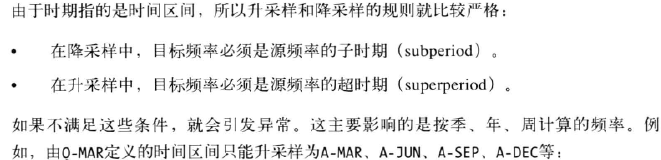

In [76]:
Image(filename="py35_picture\Resampling with Periods 2.png")

In [82]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.360226,0.105087,0.146855,-0.061421
2001Q1,0.360226,0.105087,0.146855,-0.061421
2001Q2,0.360226,0.105087,0.146855,-0.061421
2001Q3,0.360226,0.105087,0.146855,-0.061421
2001Q4,-0.565427,-0.064707,0.413199,-0.433174
2002Q1,-0.565427,-0.064707,0.413199,-0.433174
2002Q2,-0.565427,-0.064707,0.413199,-0.433174
2002Q3,-0.565427,-0.064707,0.413199,-0.433174


## 七、时间序列绘图

In [4]:
close_px_all = pd.read_csv('py35_data/stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
print(close_px)

              AAPL   MSFT    XOM
2003-01-02    7.40  21.11  29.22
2003-01-03    7.45  21.14  29.24
2003-01-06    7.45  21.52  29.96
2003-01-07    7.43  21.93  28.95
2003-01-08    7.28  21.31  28.83
2003-01-09    7.34  21.93  29.44
2003-01-10    7.36  21.97  29.03
2003-01-13    7.32  22.16  28.91
2003-01-14    7.30  22.39  29.17
2003-01-15    7.22  22.11  28.77
2003-01-16    7.31  21.75  28.90
2003-01-17    7.05  20.22  28.60
2003-01-20    7.05  20.22  28.60
2003-01-21    7.01  20.17  27.94
2003-01-22    6.94  20.04  27.58
2003-01-23    7.09  20.54  27.52
2003-01-24    6.90  19.59  26.93
2003-01-27    7.07  19.32  26.21
2003-01-28    7.29  19.18  26.90
2003-01-29    7.47  19.61  27.88
2003-01-30    7.16  18.95  27.37
2003-01-31    7.18  18.65  28.13
2003-02-03    7.33  19.08  28.52
2003-02-04    7.30  18.59  28.52
2003-02-05    7.22  18.45  28.11
2003-02-06    7.22  18.63  27.87
2003-02-07    7.07  18.30  27.66
2003-02-10    7.18  18.62  27.87
2003-02-11    7.18  18.25  27.67
2003-02-12

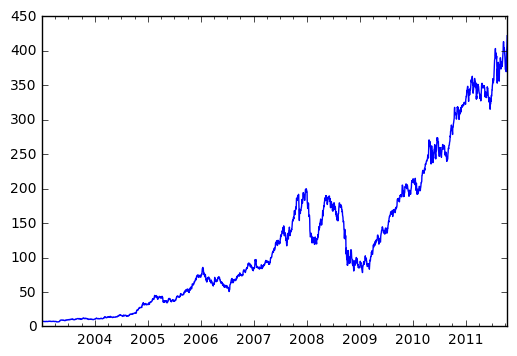

In [93]:
close_px['AAPL'].plot()

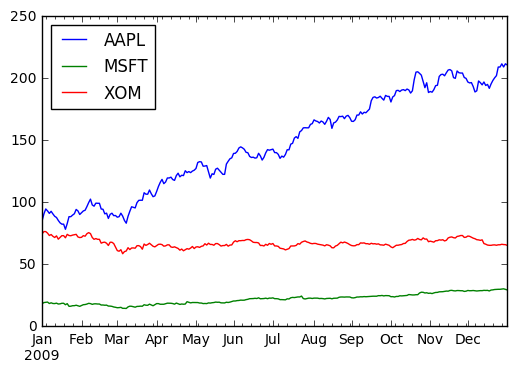

In [94]:
close_px.ix['2009'].plot()

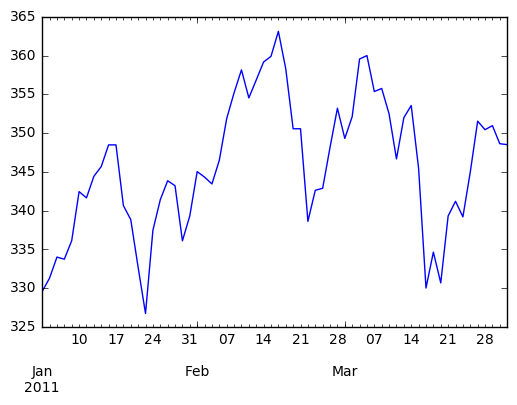

In [95]:
close_px['AAPL'].ix['01-2011':'03-2011'].plot()

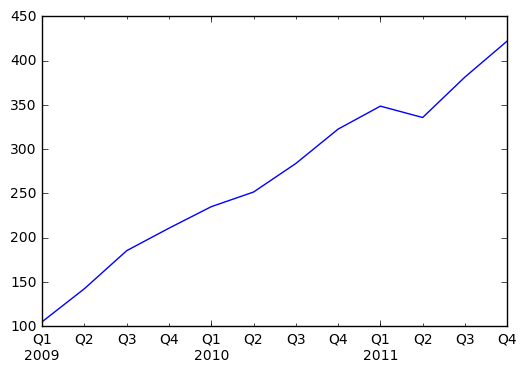

In [96]:
appl_q = close_px['AAPL'].resample('Q-DEC').ffill()
appl_q.ix['2009':].plot()

## 八、移动窗口函数

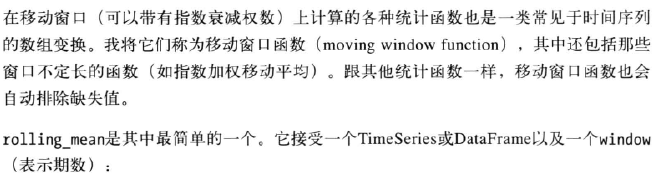

In [97]:
Image(filename="py35_picture\Moving Window Functions.png")

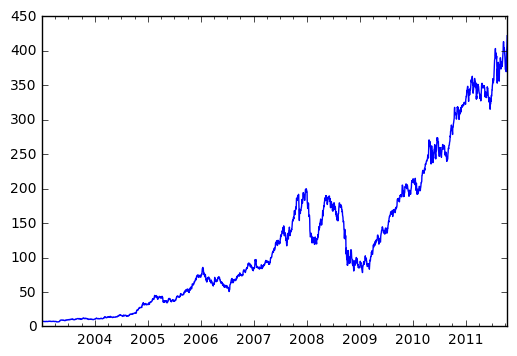

In [98]:
close_px.AAPL.plot()

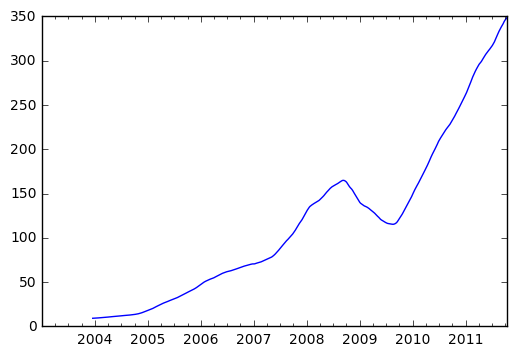

In [102]:
pd.Series.rolling(close_px.AAPL, 250).mean().plot()

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64


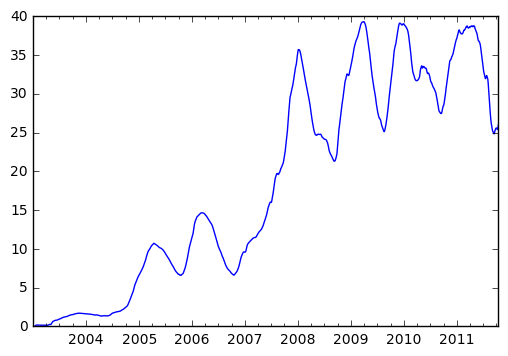

In [108]:
appl_std250 = pd.Series.rolling(close_px.AAPL, 250, min_periods=10).std()
print(appl_std250[5:12])
appl_std250.plot()

In [107]:
# 通过rolling定义扩展平均
expanding_mean = lambda x: rolling_mean(x, len(x), min_periods=1)

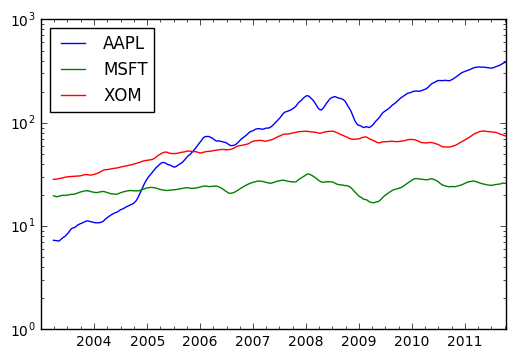

In [106]:
pd.Series.rolling(close_px, 60).mean().plot(logy=True)

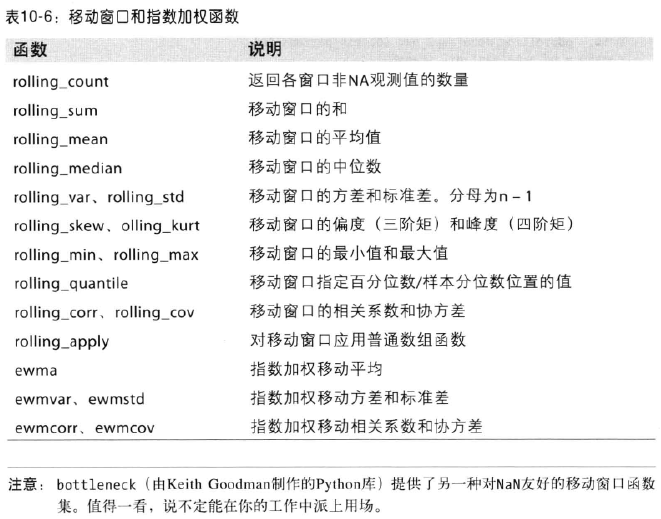

In [109]:
Image(filename="py35_picture\Moving window and exponentially-weighted functions.png")

### 1 指数加权函数

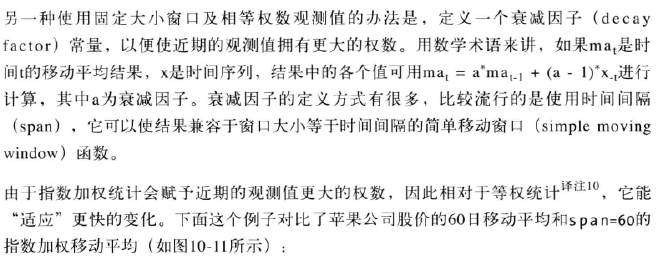

In [25]:
Image(filename="py35_picture\Exponentially-weighted functions.png")

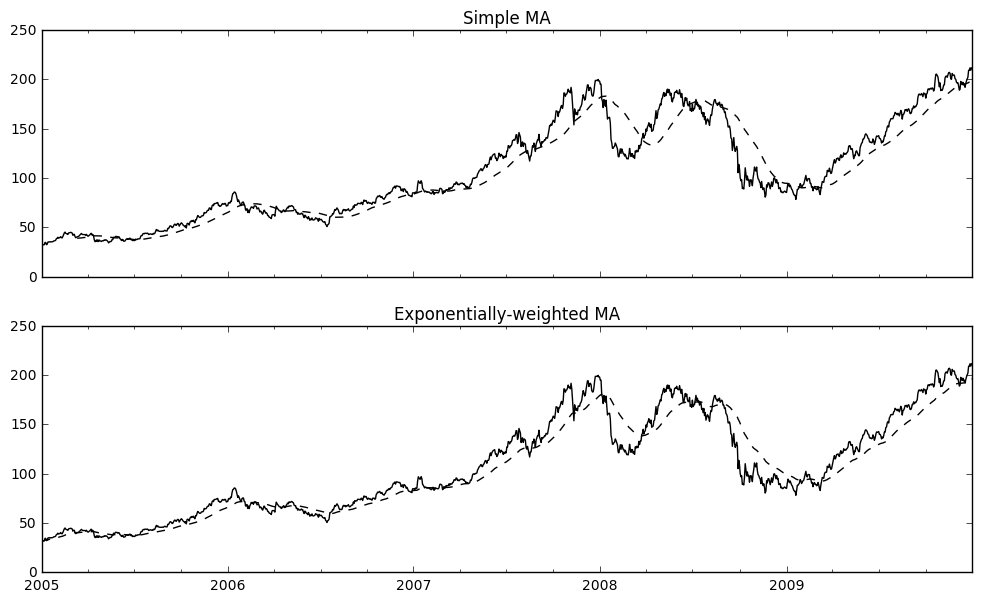

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True,figsize=(12, 7))
aapl_px = close_px.AAPL['2005':'2009']
ma60 = pd.Series.rolling(aapl_px, 60, min_periods=50).mean()
ewma60 = pd.Series.ewm(aapl_px, span=60).mean()
aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

### 2 二元移动窗口函数

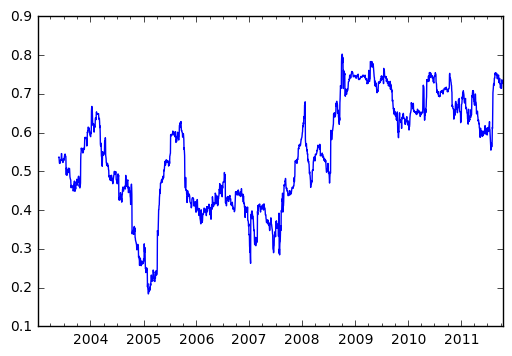

In [11]:
spx_px = close_px_all['SPX']
spx_rets = spx_px / spx_px.shift(1) - 1
returns = close_px.pct_change()
corr = pd.Series.rolling(returns.AAPL, 125, min_periods = 100).corr(spx_rets)
corr.plot()

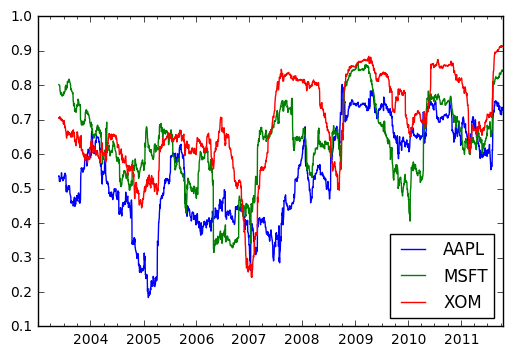

In [12]:
# 多只股票与标准普尔500指数的相关系数
corr = pd.Series.rolling(returns, 125, min_periods = 100).corr(spx_rets)
corr.plot()

### 3 用户定义的移动窗口函数

In [27]:
Image(filename="py35_picture\User Defined.png")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 12-13: truncated \UXXXXXXXX escape (<ipython-input-27-f28b7854afa9>, line 1)

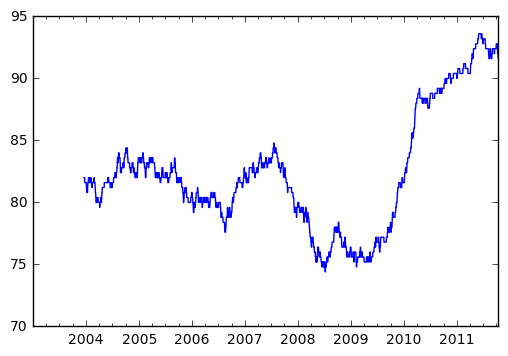

In [29]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = pd.Series.rolling(returns.AAPL, 250).apply(score_at_2percent)
result.plot()

## 九、性能和内存使用方面的注意事项